**EDA on stack overflow**

In [ ]:
!pip install jovian opendatasets --upgrade --quiet
import opendatasets as od

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 899.6 kB/s eta 0:00:00


In [ ]:
od.download('stackoverflow-developer-survey-2020')

94609408it [00:01, 65375073.85it/s]                               


16384it [00:00, 89615.83it/s]           


8192it [00:00, 63720.48it/s]            


In [ ]:
import os
os.listdir('stackoverflow-developer-survey-2020')

['survey_results_schema.csv', 'README.txt', 'survey_results_public.csv']

In [ ]:
import pandas as pd

In [ ]:
survey_ra_df = pd.read_csv('/content/stackoverflow-developer-survey-2020/survey_results_public.csv')


In [ ]:
survey_ra_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [ ]:
survey_ra_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [ ]:
schema_fname = '/content/stackoverflow-developer-survey-2020/survey_results_schema.csv'

In [ ]:
foo = pd.read_csv(schema_fname)
foo.columns

Index(['Column', 'QuestionText'], dtype='object')

In [ ]:
schema_ra = pd.read_csv(schema_fname, index_col='Column').QuestionText
print(schema_ra)

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object


In [ ]:
schema_ra['Age']

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

data prep and cleaning:

1 demographics of the survey respondents and the global programming community.
2 distribution of progrm skills, exp, and prefs
3 emoployment related info, prefs, and opinions.

In [ ]:
selected_columns = [
    #demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    #programming exp
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    #employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [ ]:
len(selected_columns)

20

In [ ]:
survey_df = survey_ra_df[selected_columns].copy()
schema = schema_ra[selected_columns]

In [ ]:
survey_df.shape

(64461, 20)

In [ ]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [ ]:
survey_df['Age1stCode']= pd.to_numeric(survey_df.Age1stCode, errors ='coerce')
survey_df['YearsCode']= pd.to_numeric(survey_df.YearsCode, errors ='coerce')
survey_df['YearsCodePro']= pd.to_numeric(survey_df.YearsCodePro, errors ='coerce')

In [ ]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [ ]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace = True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace = True)

In [ ]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace = True)

In [ ]:
survey_df['Gender'].value_counts()

,count
Gender,
Man,45895
Woman,3835
"Non-binary, genderqueer, or gender non-conforming",385
"Man;Non-binary, genderqueer, or gender non-conforming",121
"Woman;Non-binary, genderqueer, or gender non-conforming",92
Woman;Man,73
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",25


In [ ]:
import numpy as np
survey_df.where(~(survey_df.Gender.str.contains(',', na=False)), np.nan, inplace = True)

In [ ]:
survey_df['Gender'].value_counts()

,count
Gender,
Man,45895
Woman,3835
Woman;Man,73


In [ ]:
survey_df.sample(5)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
28153,United States,13.0,Man,Primary/elementary school,NaN,Yes,12.0,2.0,NaN,C#;Java,Python,Every few months,Play games;Visit Stack Overflow;Go for a walk ...,Student,NaN,NaN,NaN,NaN,NaN,NaN
17908,United States,30.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A social science (such as anthropology, psycho...",Yes,12.0,8.0,6.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Ruby,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Ruby,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Fairly important
43467,United Kingdom,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A social science (such as anthropology, psycho...",No,5.0,10.0,10.0,Bash/Shell/PowerShell;HTML/CSS;Python;SQL,Bash/Shell/PowerShell;SQL,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Database administrator;DevOps specialist;Engin...,50.0,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Not at all important/not necessary
28154,Germany,30.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,15.0,10.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript,Bash/Shell/PowerShell;C#,Once every few years,Play games;Visit Stack Overflow;Go for a walk ...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Neither satisfied nor dissatisfied,Flex time or a flexible schedule;Remote work o...,Never,Fairly important
42954,Canada,46.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,12.0,32.0,21.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Data or business analyst;Developer, full-stack...",45.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Very important


In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [ ]:
schema.Country

'Where do you live?'

In [ ]:
survey_df.Country.nunique()

183

In [ ]:
top_countries = survey_df.Country.value_counts().head(20)
top_countries

,count
Country,
United States,12246
India,8371
United Kingdom,3847
Germany,3836
Canada,2155
France,1866
Brazil,1800
Netherlands,1326
Poland,1257


In [ ]:
top_countries

,count
Country,
United States,12246
India,8371
United Kingdom,3847
Germany,3836
Canada,2155
France,1866
Brazil,1800
Netherlands,1326
Poland,1257


<Axes: title={'center': 'Where do you live?'}, xlabel='Country', ylabel='count'>

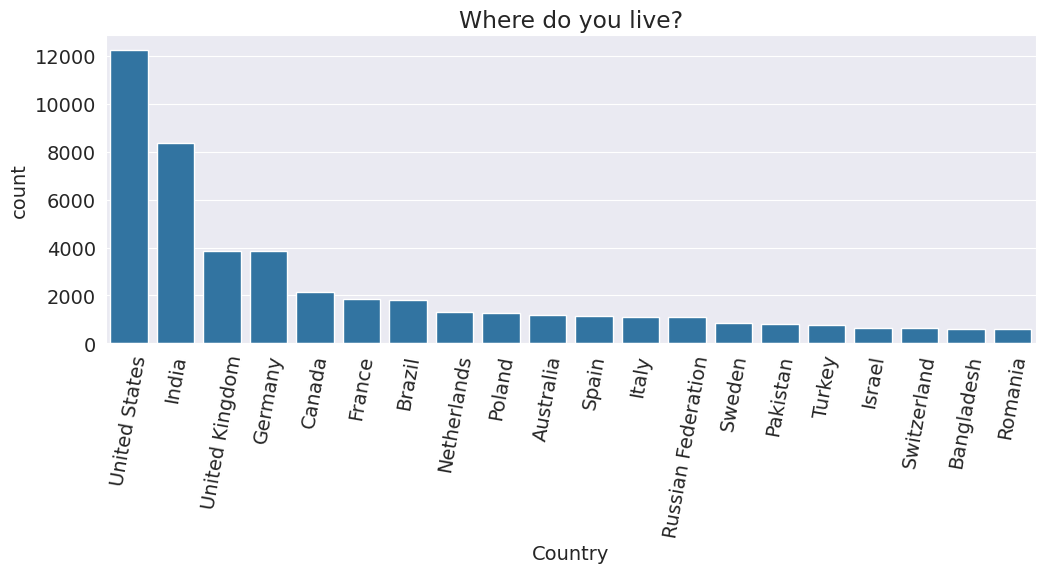

In [ ]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=80)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y = top_countries)

(array([  207.,  2383.,  9071., 11859.,  8690.,  5554.,  3021.,  1747.,
         1033.,   621.,   332.,   143.,    75.]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
        75.]),
 <BarContainer object of 13 artists>)

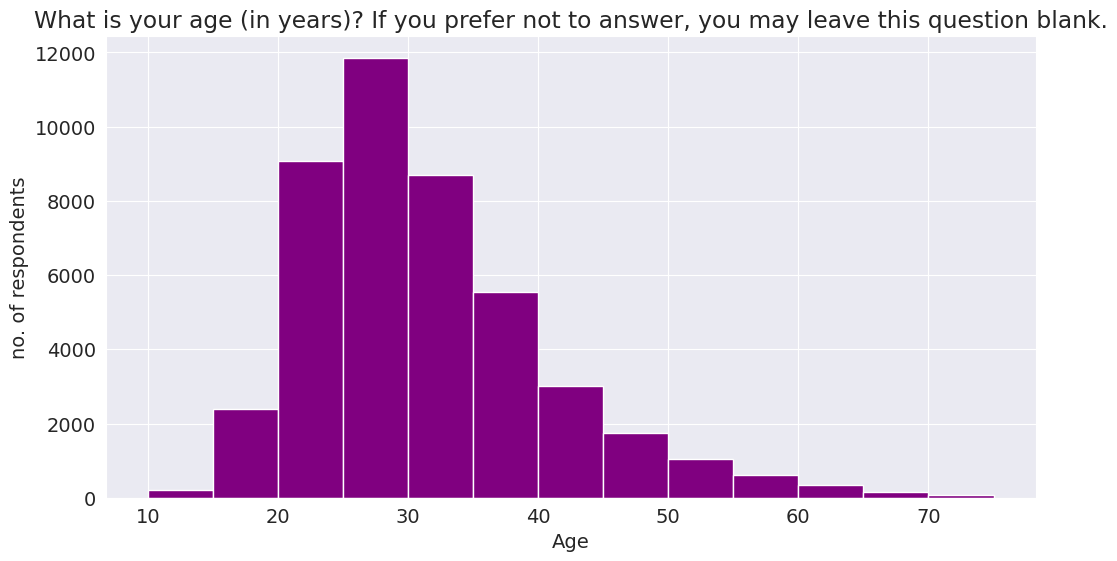

In [ ]:
plt.figure(figsize=(12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('no. of respondents')

plt.hist(survey_df.Age, bins = np.arange(10, 80, 5), color = 'purple')


In [ ]:
schema.Gender


'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [ ]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

,count
Gender,
Man,45895
Woman,3835
Woman;Man,73


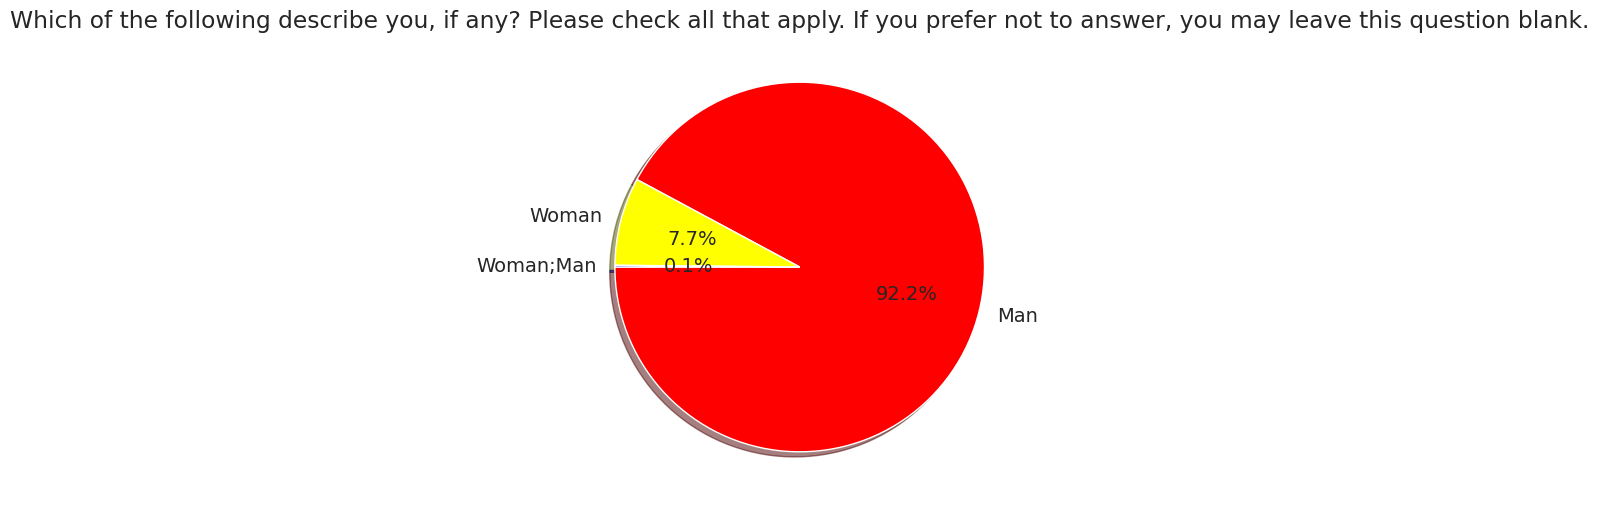

In [ ]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', startangle=180, shadow = True, colors = ['red', 'yellow', 'blue']);

Text(0, 0.5, '')

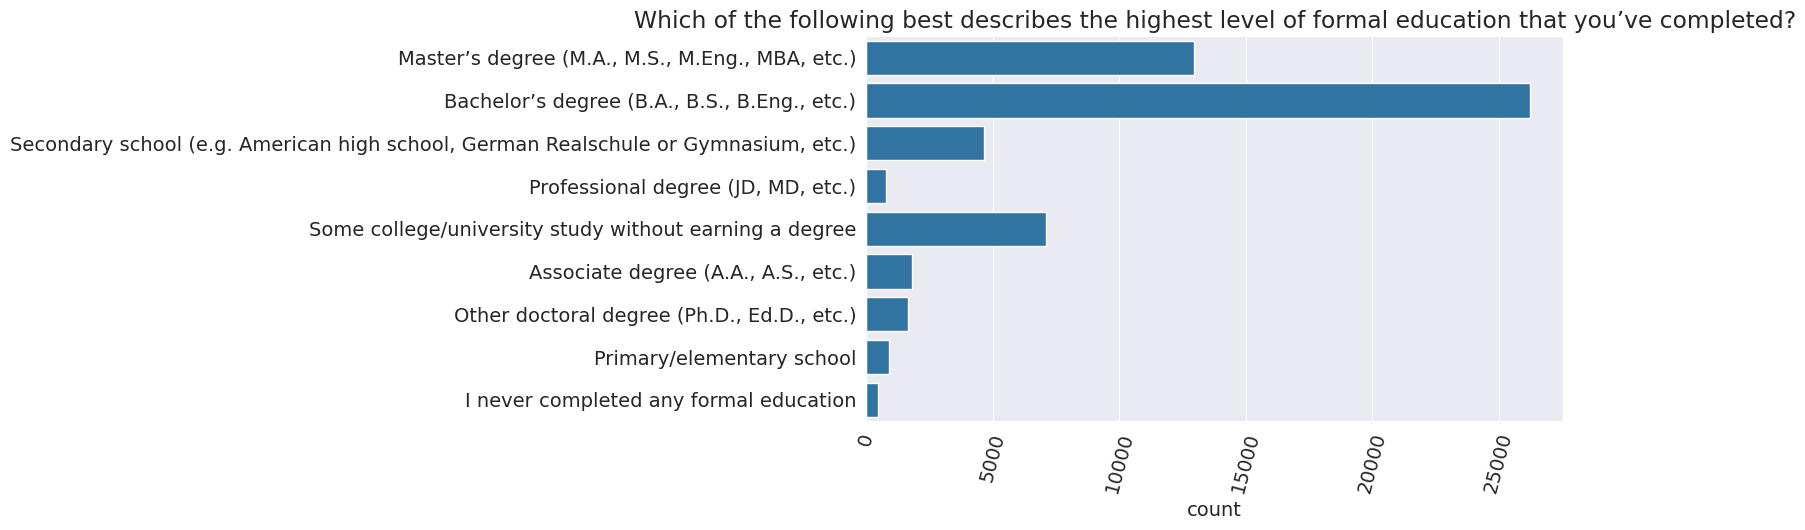

In [ ]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation = 75)
plt.title(schema['EdLevel'])
plt.ylabel(None)

In [ ]:
schema.UndergradMajor


'What was your primary field of study?'

Text(0.5, 0, 'percentage')

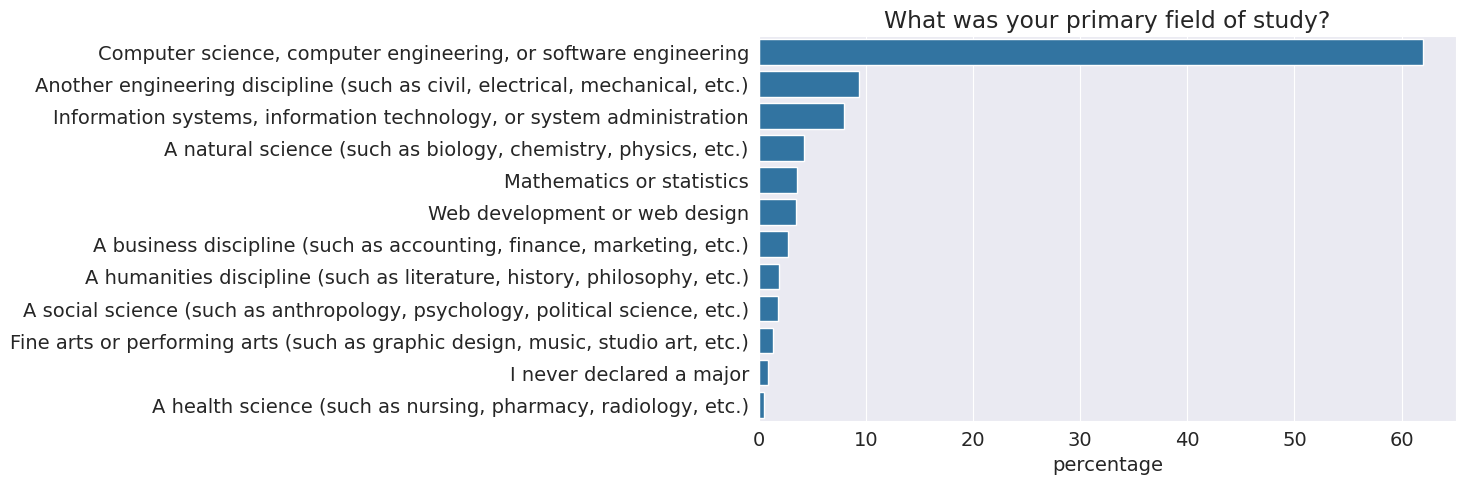

In [ ]:
undergrad_pct = survey_df.UndergradMajor.value_counts()*100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None)
plt.xlabel('percentage')

In [ ]:
schema.Employment

'Which of the following best describes your current employment status?'

Text(0.5, 0, 'percentage')

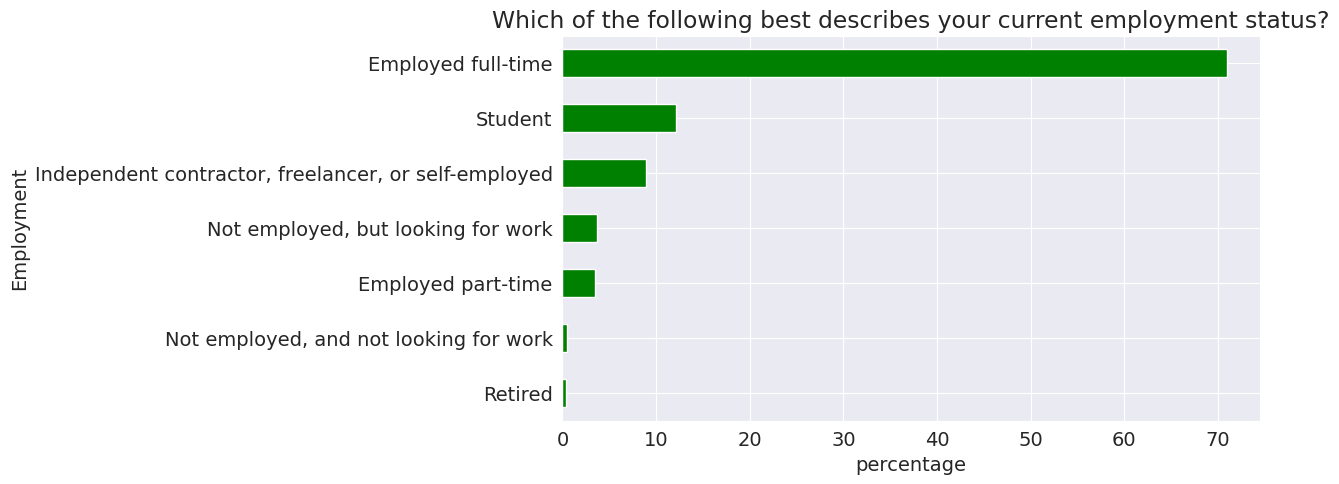

In [ ]:
(survey_df.Employment.value_counts(normalize = True, ascending = True)*100).plot(kind = 'barh', color = 'g')
plt.title(schema.Employment)
plt.xlabel('percentage')

In [ ]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [ ]:
def split_multicolumn(col_series):
  result_df = col_series.to_frame()
  options = []
  for idx, value in col_series[col_series.notnull()].items():
    for option in value.split(';'):
      if option not in result_df.columns:
        options.append(option)
        result_df[option]=False
      result_df.at[idx,option]=True
  return result_df[options]

In [ ]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
